In [1]:
# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the training set
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:6].values
for i in range(len(training_set)):
    training_set[i,3] = int(training_set[i,3].replace(',','').replace('.',''))/100.0
    training_set[i,4] = float(training_set[i,4].replace(',',''))
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
ts = 60
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(ts, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-ts:i, :])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
print(X_train.shape)
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 5))

(1198, 60, 5)


C:\Users\DR\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [ ]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 5)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Using TensorFlow backend.


Epoch 1/100
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0440
Epoch 2/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0062
Epoch 3/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0052A: 2s - 
Epoch 4/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0049
Epoch 5/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0044
Epoch 6/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0045
Epoch 7/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0044
Epoch 8/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0047A: 1s - loss
Epoch 9/100
 384/1198 [========>.....................] - ETA: 4s - loss: 0.0041

In [ ]:
lb=min(training_set[:,0])
ub=max(training_set[:,0])

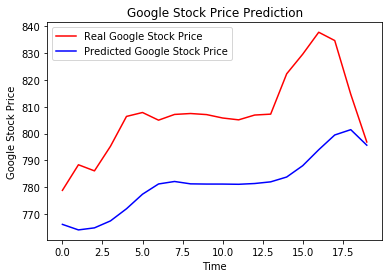

In [28]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
testing_set= dataset_test.iloc[:, 1:6].values
real_stock_price = testing_set[:,0]
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train.iloc[:,1:6], dataset_test.iloc[:,1:6]), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - ts:].values
for i in range(len(inputs)):
    inputs[i,4] = float(inputs[i,4].replace(',',''))
inputs = inputs.reshape(-1,5)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, :])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 5))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = [s*(ub-lb)+lb for s in predicted_stock_price]

# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()


In [29]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
rmse

28.002620118235754